<a href="https://colab.research.google.com/github/AnnaBujniewicz/Masters_thesis/blob/main/9_Result_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#  get  and clean up the set
results = pd.read_csv("https://raw.githubusercontent.com/AnnaBujniewicz/data_stuffs/master/final_results.csv", index_col=0)
results = results.T
for col in results.iloc[:,:-1].columns:
  results[col] = pd.to_numeric(results[col])

In [ ]:
# analytics for all measures at once
results.describe()

,RMSE_text,RMSE_tech,RMSE_both,R2_text,R2_tech,R2_both,acc_text,acc_tech,acc_both,total_change_text_roi,total_change_tech_roi,total_change_both_roi,total_perc_change_text_roi,total_perc_change_tech_roi,total_perc_change_both_roi,bh_roi,sma_roi,dou_roi,n_of_art
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.288193,0.246711,0.292127,-9.058009,-7.909024,-9.337561,48.863609,49.482654,49.099508,-0.049558,-0.000051,-0.048754,-0.073131,-0.001667,-0.063396,-0.006503,0.049745,0.002245,1974.603774
std,0.153221,0.154327,0.145639,11.781241,14.627571,12.502128,10.573728,5.744200,5.912119,0.076061,0.000206,0.109025,0.106488,0.008584,0.130501,0.049557,0.038385,0.032684,5044.136685
min,0.006398,0.005382,0.000965,-52.993226,-86.631908,-61.339063,23.529412,35.483871,33.870968,-0.346912,-0.001051,-0.700818,-0.564198,-0.061978,-0.819897,-0.131367,-0.001964,-0.126205,126.000000
25%,0.183831,0.101497,0.158239,-9.449763,-8.277679,-9.925716,44.444444,45.161290,46.774194,-0.048887,0.000000,-0.044447,-0.097744,0.000000,-0.058663,-0.018127,0.027633,-0.003125,242.000000
50%,0.304298,0.279774,0.291331,-5.543203,-2.138769,-5.398354,50.000000,50.000000,48.387097,-0.018500,0.000000,-0.015596,-0.028743,0.000000,-0.020492,0.000000,0.041806,0.000000,443.000000
75%,0.383121,0.386941,0.381745,-1.860519,0.038137,-2.141158,55.555556,53.225806,53.225806,-0.000177,0.000000,0.000000,-0.003754,0.000000,-0.000165,0.000000,0.061191,0.020491,1501.000000
max,0.593065,0.487569,0.592027,-0.107355,0.560403,-0.081472,71.428571,61.290323,61.290323,0.002556,0.000000,0.001154,0.000131,0.000000,0.002061,0.274849,0.235095,0.060340,32654.000000


In [ ]:
# mean across industries
results.groupby(by="sector").mean()

,RMSE_text,RMSE_tech,RMSE_both,R2_text,R2_tech,R2_both,acc_text,acc_tech,acc_both,total_change_text_roi,total_change_tech_roi,total_change_both_roi,total_perc_change_text_roi,total_perc_change_tech_roi,total_perc_change_both_roi,bh_roi,sma_roi,dou_roi,n_of_art
sector,,,,,,,,,,,,,,,,,,,
Communication Services,0.287746,0.244110,0.278866,-6.458601,-5.982932,-5.633051,47.423674,48.240469,48.603433,-0.052928,-0.000057,-0.025418,-0.108403,-0.001472,-0.042593,0.005240,0.054260,-0.007263,4416.363636
Consumer Discretionary,0.283159,0.234712,0.308966,-10.287413,-7.942104,-10.677824,51.982063,51.129032,52.659968,-0.075850,0.000000,-0.118789,-0.105780,-0.000786,-0.169445,-0.015951,0.064357,0.005108,2473.700000
Consumer Staples,0.304119,0.193828,0.365867,-7.822275,-4.031025,-10.544929,51.631702,50.000000,51.939009,-0.072942,0.000000,-0.048670,-0.005411,0.000000,-0.005104,0.014987,0.040198,-0.006392,351.333333
Health Care,0.339402,0.323585,0.349630,-14.865686,-19.132487,-17.398541,45.930040,46.774194,46.645293,-0.018662,-0.000131,-0.029964,-0.049714,-0.007879,-0.040518,0.019344,0.055695,0.003909,672.875000
Industrials,0.264420,0.047630,0.285207,-2.127090,0.558595,-2.596920,50.000000,50.000000,48.387097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.068177,0.031228,0.014490,344.000000
Information Technology,0.269272,0.241279,0.257284,-8.081818,-5.467529,-7.636445,48.797740,50.322581,48.183501,-0.045886,-0.000051,-0.036536,-0.060589,-0.000062,-0.042877,-0.018715,0.039932,0.006060,1227.800000


In [ ]:
# creating a binary variable to compare low and high data models
results["n_of_art_bin"] = 0
results["n_of_art_bin"].loc[results["n_of_art"]>=1000]=1

In [ ]:
# mean across low and high data
results.groupby(by="n_of_art_bin").mean()

,RMSE_text,RMSE_tech,RMSE_both,R2_text,R2_tech,R2_both,acc_text,acc_tech,acc_both,total_change_text_roi,total_change_tech_roi,total_change_both_roi,total_perc_change_text_roi,total_perc_change_tech_roi,total_perc_change_both_roi,bh_roi,sma_roi,dou_roi,n_of_art
n_of_art_bin,,,,,,,,,,,,,,,,,,,
0,0.286671,0.235383,0.300752,-9.549474,-8.776571,-10.241193,48.349134,48.953793,48.535738,-0.030335,-0.000073,-0.030749,-0.046171,-0.000231,-0.050634,-0.014221,0.043653,-0.004240,343.189189
1,0.291714,0.272909,0.272182,-7.921496,-5.902820,-7.247913,50.053331,50.705645,50.403226,-0.094010,0.000000,-0.090390,-0.135477,-0.004988,-0.092907,0.011347,0.063831,0.017241,5747.250000


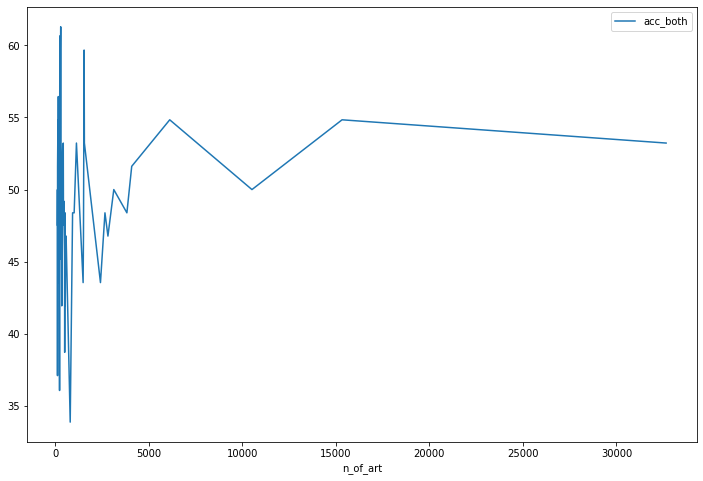

In [ ]:
#preparing a df to plot accuracy and number of  data entries
acc_vs_data = results.iloc[:,[8,18]]
acc_vs_data  = acc_vs_data.sort_values(by = "n_of_art")
acc_vs_data = acc_vs_data.set_index("n_of_art")
acc_vs_data.plot(figsize = (12,8))